In [2]:
import pandas as pd
import nibabel as nib
import os

In [3]:
DATASET_PATH='D:/AA-SANYUKTAA/Projects/BrainTumorSegmentation/Dataset/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/'

In [4]:
train_val_directories = [f.path for f in os.scandir(DATASET_PATH) if f.is_dir()]
train_val_directories.remove(DATASET_PATH + 'BraTS20_Training_355')
print(len(train_val_directories))

368


In [5]:
def getDataIds(directoryList):
    dataIds = []
    for i in range(0, len(directoryList)):
        dataIds.append(directoryList[i][directoryList[i].rfind('/') + 1 :] )
    return dataIds

train_and_test_ids = getDataIds(train_val_directories)
print(len(train_and_test_ids))
train_and_test_ids[0:10]

368


['BraTS20_Training_001',
 'BraTS20_Training_002',
 'BraTS20_Training_003',
 'BraTS20_Training_004',
 'BraTS20_Training_005',
 'BraTS20_Training_006',
 'BraTS20_Training_007',
 'BraTS20_Training_008',
 'BraTS20_Training_009',
 'BraTS20_Training_010']

In [6]:
print("Total pixels in one brain input including background : (155*240*240) :",  155*240*240)

Total pixels in one brain input including background : (155*240*240) : 8928000


In [7]:
VOLUME_SLICES = 155

In [8]:
def getBrainVolumeInPixels(brain_data):
    'To get the number of pixels contributing to the entire brain volume'
    total_brain_volume_pixels = 0
    for i in range(VOLUME_SLICES):
        flatten_slice = brain_data[:, :, i].flatten()
        brain_pixels_in_slice = np.count_nonzero(flatten_slice)
        total_brain_volume_pixels += brain_pixels_in_slice
    return total_brain_volume_pixels

In [9]:
def getMaskVolumeInPixels(brain_segmented_data):
    'To get the number of pixels contributing to each of the 4 segmentation classes'
    mask_volumes = dict([(0, 0), (1,0), (2,0), (3,0)])
    for i in range(VOLUME_SLICES):
        flatten_slice = brain_segmented_data[:, :, i].flatten()
        flatten_slice[flatten_slice == 4] = 3
        
        unique, count = np.unique(flatten_slice, return_counts=True)
        unique = unique.astype(int)
        values_dict = dict(zip(unique, count))
#         print(f'slice {i} : {values_dict}')
        for segment_class_index in range(1,4):
            mask_volumes[segment_class_index] += values_dict.get(segment_class_index, 0)
    return mask_volumes

In [10]:
sample_brain_volume_t1 = nib.load(os.path.join(DATASET_PATH, f'{train_and_test_ids[0]}/{train_and_test_ids[0]}_t1.nii')).get_fdata()
sample_brain_volume_t2 = nib.load(os.path.join(DATASET_PATH, f'{train_and_test_ids[0]}/{train_and_test_ids[0]}_t2.nii')).get_fdata()
sample_brain_volume_t1ce = nib.load(os.path.join(DATASET_PATH, f'{train_and_test_ids[0]}/{train_and_test_ids[0]}_t1ce.nii')).get_fdata()
sample_brain_volume_flair = nib.load(os.path.join(DATASET_PATH, f'{train_and_test_ids[0]}/{train_and_test_ids[0]}_flair.nii')).get_fdata()
sample_brain_volume_segmented = nib.load(os.path.join(DATASET_PATH, f'{train_and_test_ids[0]}/{train_and_test_ids[0]}_seg.nii')).get_fdata()

In [11]:
print('shape of t1 volume   :', sample_brain_volume_t1.shape)
print('shape of t1ce volume :',sample_brain_volume_t1ce.shape)
print('shape of t2 volume   :',sample_brain_volume_t2.shape)
print('shape of flair volume:',sample_brain_volume_flair.shape)
print('shape of seg volume  :',sample_brain_volume_segmented.shape)

shape of t1 volume   : (240, 240, 155)
shape of t1ce volume : (240, 240, 155)
shape of t2 volume   : (240, 240, 155)
shape of flair volume: (240, 240, 155)
shape of seg volume  : (240, 240, 155)


In [12]:
import numpy as np

In [13]:
print(f'Total pixels contributing to the brain [T1]   : {getBrainVolumeInPixels(sample_brain_volume_t1)}')
print(f'Total pixels contributing to the brain [T1ce] : {getBrainVolumeInPixels(sample_brain_volume_t1ce)}')
print(f'Total pixels contributing to the brain [T2]   : {getBrainVolumeInPixels(sample_brain_volume_t2)}')
print(f'Total pixels contributing to the brain [Flair]: {getBrainVolumeInPixels(sample_brain_volume_flair)}')

brain_volume_pixels = (getBrainVolumeInPixels(sample_brain_volume_t1) + getBrainVolumeInPixels(sample_brain_volume_t1ce) + getBrainVolumeInPixels(sample_brain_volume_t2) + getBrainVolumeInPixels(sample_brain_volume_flair))//4
print(f"final conclusion : {brain_volume_pixels}")

Total pixels contributing to the brain [T1]   : 1342885
Total pixels contributing to the brain [T1ce] : 1342885
Total pixels contributing to the brain [T2]   : 1342885
Total pixels contributing to the brain [Flair]: 1342885
final conclusion : 1342885


In [14]:
for i in range(VOLUME_SLICES):
    print(np.max(np.unique(sample_brain_volume_t1[:, :, i].flatten())),    np.max(np.unique(sample_brain_volume_t2[:, :, i].flatten())))

0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
359.0 144.0
387.0 196.0
377.0 222.0
370.0 262.0
367.0 269.0
380.0 288.0
380.0 300.0
378.0 288.0
372.0 268.0
375.0 306.0
398.0 261.0
374.0 273.0
375.0 268.0
383.0 289.0
393.0 299.0
403.0 298.0
414.0 297.0
404.0 308.0
402.0 306.0
422.0 300.0
434.0 289.0
436.0 321.0
434.0 303.0
423.0 303.0
428.0 316.0
436.0 333.0
421.0 313.0
437.0 337.0
440.0 347.0
514.0 343.0
481.0 328.0
467.0 332.0
436.0 344.0
455.0 368.0
457.0 376.0
451.0 351.0
463.0 347.0
479.0 348.0
487.0 373.0
485.0 350.0
503.0 325.0
508.0 334.0
519.0 348.0
529.0 324.0
512.0 333.0
533.0 342.0
535.0 317.0
547.0 318.0
550.0 312.0
566.0 345.0
549.0 320.0
538.0 316.0
557.0 332.0
615.0 340.0
632.0 319.0
585.0 307.0
596.0 329.0
561.0 353.0
558.0 357.0
574.0 352.0
560.0 338.0
572.0 338.0
583.0 326.0
638.0 333.0
560.0 323.0
564.0 317.0
577.0 326.0
560.0 310.0
572.0 306.0
644.0 314.0
678.0 315.0
636.0 312.0
598.0 305.0
568.0 315.0
571.0 319.0
556.0 316.0
565.0 328.0
562.0 316.0
577.0 312.0
572.0 305.0
577.0 30

In [15]:
mask_volumes = getMaskVolumeInPixels(sample_brain_volume_segmented)
mask_volumes[0] = brain_volume_pixels - (mask_volumes[1] + mask_volumes[2] + mask_volumes[3])
mask_volumes

{0: 1130906, 1: 15443, 2: 168794, 3: 27742}

In [16]:
SEGMENTATION_CLASS = {
    0 : 'NOT TUMOR',
    1 : 'NECROTIC AND NON-ENHANCING TUMOR CORE',
    2 : 'PERITUMORAL EDEMA',
    3 : 'GD ENHANCING TUMOR',
}

In [17]:
survival_df = pd.read_csv('survival_info.csv')
survival_df.head()

,Brats20ID,Age,Survival_days,Extent_of_Resection
0,BraTS20_Training_001,60.463,289,GTR
1,BraTS20_Training_002,52.263,616,GTR
2,BraTS20_Training_003,54.301,464,GTR
3,BraTS20_Training_004,39.068,788,GTR
4,BraTS20_Training_005,68.493,465,GTR


In [18]:
survival_df.drop(survival_df[survival_df['Extent_of_Resection'] != 'GTR'].index, inplace=True)
survival_df = survival_df.drop(['Extent_of_Resection'], axis=1)
survival_df = survival_df.reset_index(drop = True)
survival_df

,Brats20ID,Age,Survival_days
0,BraTS20_Training_001,60.463,289
1,BraTS20_Training_002,52.263,616
2,BraTS20_Training_003,54.301,464
3,BraTS20_Training_004,39.068,788
4,BraTS20_Training_005,68.493,465
...,...,...,...
114,BraTS20_Training_360,50.000,540
115,BraTS20_Training_363,57.000,62
116,BraTS20_Training_366,72.000,633
117,BraTS20_Training_368,49.000,442


In [19]:
mask_volumes_df_list = {seg: [] for seg in SEGMENTATION_CLASS.values()}
mask_volumes_df_list

{'NOT TUMOR': [],
 'NECROTIC AND NON-ENHANCING TUMOR CORE': [],
 'PERITUMORAL EDEMA': [],
 'GD ENHANCING TUMOR': []}

In [20]:
DATASET_PATH='D:/AA-SANYUKTAA/Projects/BrainTumorSegmentation/Dataset/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/'
def generateData(data_ids):
    mask_volumes_df_list = {seg: [] for seg in SEGMENTATION_CLASS.values()}
    for data_id in data_ids:
            brain_volume_t1 = nib.load(os.path.join(DATASET_PATH, f'{data_id}/{data_id}_t1.nii')).get_fdata()
            brain_volume_t2 = nib.load(os.path.join(DATASET_PATH, f'{data_id}/{data_id}_t2.nii')).get_fdata()
            brain_volume_t1ce = nib.load(os.path.join(DATASET_PATH, f'{data_id}/{data_id}_t1ce.nii')).get_fdata()
            brain_volume_flair = nib.load(os.path.join(DATASET_PATH, f'{data_id}/{data_id}_flair.nii')).get_fdata()
            brain_volume_segmented = nib.load(os.path.join(DATASET_PATH, f'{data_id}/{data_id}_seg.nii')).get_fdata()
            
            brain_volume_pixels = (getBrainVolumeInPixels(brain_volume_t1) + 
                                   getBrainVolumeInPixels(brain_volume_t1ce) + 
                                   getBrainVolumeInPixels(brain_volume_t2) + 
                                   getBrainVolumeInPixels(brain_volume_flair))//4
            
            print(brain_volume_pixels)

            mask_volumes = getMaskVolumeInPixels(brain_volume_segmented)
            mask_volumes[0] = brain_volume_pixels - (mask_volumes[1] + mask_volumes[2] + mask_volumes[3])
            
            print(f"{data_id}:", mask_volumes, end=" ")

            for c in range(4):
                mask_volumes[c] = mask_volumes[c]/brain_volume_pixels
                
            print(f"{data_id}:", mask_volumes)
            
            for key in SEGMENTATION_CLASS.keys():
                mask_volumes_df_list[SEGMENTATION_CLASS[key]].append(mask_volumes[key])

    return mask_volumes_df_list

mask_volumes_df_list = generateData(survival_df["Brats20ID"].values)

1342885
BraTS20_Training_001: {0: 1130906, 1: 15443, 2: 168794, 3: 27742} BraTS20_Training_001: {0: 0.8421465724913153, 1: 0.011499867821890929, 2: 0.1256950520707283, 3: 0.02065850761606541}
1539197
BraTS20_Training_002: {0: 1472189, 1: 9160, 2: 51299, 3: 6549} BraTS20_Training_002: {0: 0.9564656116143677, 1: 0.005951155050328191, 2: 0.03332841735008579, 3: 0.004254815985218267}
1261120
BraTS20_Training_003: {0: 1231313, 1: 733, 2: 26076, 3: 2998} BraTS20_Training_003: {0: 0.9763646599847754, 1: 0.0005812293834052271, 2: 0.020676858665313373, 3: 0.002377251966505963}
1523118
BraTS20_Training_004: {0: 1419622, 1: 10902, 2: 77096, 3: 15498} BraTS20_Training_004: {0: 0.9320499134013255, 1: 0.00715768574726318, 2: 0.05061722072748139, 3: 0.01017518012392999}
1441667
BraTS20_Training_005: {0: 1419704, 1: 3624, 2: 7553, 3: 10786} BraTS20_Training_005: {0: 0.9847655526553636, 1: 0.002513756644218117, 2: 0.0052390739331620965, 3: 0.0074816167672562385}
1468424
BraTS20_Training_006: {0: 132919

In [21]:
print(mask_volumes)

{0: 1130906, 1: 15443, 2: 168794, 3: 27742}


In [22]:
len(mask_volumes_df_list['NOT TUMOR'])


119

## cross check the values for any one of the data_id

In [23]:
test_brain_volume_t1 = nib.load(os.path.join(DATASET_PATH, 'BraTS20_Training_113/BraTS20_Training_113_t1.nii')).get_fdata()
test_brain_volume_t2 = nib.load(os.path.join(DATASET_PATH, 'BraTS20_Training_113/BraTS20_Training_113_t2.nii')).get_fdata()
test_brain_volume_t1ce = nib.load(os.path.join(DATASET_PATH, 'BraTS20_Training_113/BraTS20_Training_113_t1ce.nii')).get_fdata()
test_brain_volume_flair = nib.load(os.path.join(DATASET_PATH, 'BraTS20_Training_113/BraTS20_Training_113_flair.nii')).get_fdata()
print(type(test_brain_volume_flair))
print(test_brain_volume_flair.shape)


<class 'numpy.memmap'>
(240, 240, 155)


In [24]:
test_brain_volume_pixels = ( getBrainVolumeInPixels(test_brain_volume_t1) +getBrainVolumeInPixels(test_brain_volume_t1ce) + getBrainVolumeInPixels(test_brain_volume_t2) + getBrainVolumeInPixels(test_brain_volume_flair))//3

print(f"final conclusion : {test_brain_volume_pixels}")

final conclusion : 1895895


In [25]:
test_brain_volume_segmented = nib.load(os.path.join(DATASET_PATH, 'BraTS20_Training_113/BraTS20_Training_113_seg.nii')).get_fdata()
test_mask_volumes = getMaskVolumeInPixels(test_brain_volume_segmented)
test_mask_volumes[0] =  test_brain_volume_pixels - (test_mask_volumes[1] + test_mask_volumes[2] + test_mask_volumes[3])
test_mask_volumes

{0: 1770215, 1: 2346, 2: 119083, 3: 4251}

###### {0: 1296241, 1: 2346, 2: 119083, 3: 4251} matching with the data generated.

## Appending the mask volumes to the existing survival dataframe

In [26]:
for seg_key in mask_volumes_df_list:
    survival_df[seg_key] = mask_volumes_df_list[seg_key]
survival_df

,Brats20ID,Age,Survival_days,NOT TUMOR,NECROTIC AND NON-ENHANCING TUMOR CORE,PERITUMORAL EDEMA,GD ENHANCING TUMOR
0,BraTS20_Training_001,60.463,289,0.842147,0.011500,0.125695,0.020659
1,BraTS20_Training_002,52.263,616,0.956466,0.005951,0.033328,0.004255
2,BraTS20_Training_003,54.301,464,0.976365,0.000581,0.020677,0.002377
3,BraTS20_Training_004,39.068,788,0.932050,0.007158,0.050617,0.010175
4,BraTS20_Training_005,68.493,465,0.984766,0.002514,0.005239,0.007482
...,...,...,...,...,...,...,...
114,BraTS20_Training_360,50.000,540,0.898559,0.013138,0.043237,0.045065
115,BraTS20_Training_363,57.000,62,0.910677,0.017722,0.037071,0.034530
116,BraTS20_Training_366,72.000,633,0.956170,0.003713,0.021395,0.018722
117,BraTS20_Training_368,49.000,442,0.938822,0.000976,0.047992,0.012210


In [27]:
survival_df["Brats20ID"]

0      BraTS20_Training_001
1      BraTS20_Training_002
2      BraTS20_Training_003
3      BraTS20_Training_004
4      BraTS20_Training_005
               ...         
114    BraTS20_Training_360
115    BraTS20_Training_363
116    BraTS20_Training_366
117    BraTS20_Training_368
118    BraTS20_Training_369
Name: Brats20ID, Length: 119, dtype: object

## Storing the original (not normalized) survival data with mask volumes GTR only

In [28]:
survival_df.to_csv('survival_processed_data_with_mask_volumes_not_normalized.csv', index=False)


In [29]:
survival_df.loc[survival_df['Brats20ID'] == 'BraTS20_Training_006']

,Brats20ID,Age,Survival_days,NOT TUMOR,NECROTIC AND NON-ENHANCING TUMOR CORE,PERITUMORAL EDEMA,GD ENHANCING TUMOR
5,BraTS20_Training_006,67.126,269,0.905184,0.013502,0.064325,0.016989


## Cross Check


##### BraTS20_Training_113: {0: 1296241, 1: 2346, 2: 119083, 3: 4251} BraTS20_Training_113: {0: 0.9116125298100246, 1: 0.0016498806895741747, 2: 0.08374797193374316, 3: 0.0029896175666580633}

## Survival Prediction

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans

In [31]:
survival_df=pd.read_csv('survival_processed_data_with_mask_volumes_not_normalized.csv')


In [32]:
survival_df

,Brats20ID,Age,Survival_days,NOT TUMOR,NECROTIC AND NON-ENHANCING TUMOR CORE,PERITUMORAL EDEMA,GD ENHANCING TUMOR
0,BraTS20_Training_001,60.463,289,0.842147,0.011500,0.125695,0.020659
1,BraTS20_Training_002,52.263,616,0.956466,0.005951,0.033328,0.004255
2,BraTS20_Training_003,54.301,464,0.976365,0.000581,0.020677,0.002377
3,BraTS20_Training_004,39.068,788,0.932050,0.007158,0.050617,0.010175
4,BraTS20_Training_005,68.493,465,0.984766,0.002514,0.005239,0.007482
...,...,...,...,...,...,...,...
114,BraTS20_Training_360,50.000,540,0.898559,0.013138,0.043237,0.045065
115,BraTS20_Training_363,57.000,62,0.910677,0.017722,0.037071,0.034530
116,BraTS20_Training_366,72.000,633,0.956170,0.003713,0.021395,0.018722
117,BraTS20_Training_368,49.000,442,0.938822,0.000976,0.047992,0.012210


In [33]:
survival_df['Survival_days'].unique()

array(['289', '616', '464', '788', '465', '269', '503', '1155', '515',
       '495', '698', '359', '169', '368', '439', '486', '287', '576',
       '350', '332', '331', '106', '473', '1283', '89', '172', '84',
       '726', '660', '522', '597', '239', '208', '355', '152', '385',
       '453', '1592', '376', '12', '579', '614', '387', '180', '139',
       '375', '1767', '168', '345', '114', '191', '50', '58', '448',
       '401', 'ALIVE (361 days later)', '510', '296', '278', '146',
       '1527', '353', '56', '21', '1227', '182', '277', '155', '1148',
       '78', '580', '77', '427', '409', '412', '334', '74', '684', '613',
       '142', '538', '416', '240', '524', '319', '730', '336', '342',
       '688', '1410', '374', '117', '692', '120', '150', '300', '630',
       '330', '728', '540', '1076', '250', '615', '105', '1293', '260',
       '1096', '351', '184', '197', '456', '62', '633', '442', '145'],
      dtype=object)

In [34]:
survival_df.loc[survival_df['Survival_days'].str.isnumeric() != True]

,Brats20ID,Age,Survival_days,NOT TUMOR,NECROTIC AND NON-ENHANCING TUMOR CORE,PERITUMORAL EDEMA,GD ENHANCING TUMOR
56,BraTS20_Training_084,61.622,ALIVE (361 days later),0.96161,0.006763,0.019852,0.011775


In [35]:
survival_df.drop(survival_df[survival_df['Survival_days'].str.isnumeric() != True].index, inplace=True)
survival_df = survival_df.reset_index(drop = True)
survival_df

,Brats20ID,Age,Survival_days,NOT TUMOR,NECROTIC AND NON-ENHANCING TUMOR CORE,PERITUMORAL EDEMA,GD ENHANCING TUMOR
0,BraTS20_Training_001,60.463,289,0.842147,0.011500,0.125695,0.020659
1,BraTS20_Training_002,52.263,616,0.956466,0.005951,0.033328,0.004255
2,BraTS20_Training_003,54.301,464,0.976365,0.000581,0.020677,0.002377
3,BraTS20_Training_004,39.068,788,0.932050,0.007158,0.050617,0.010175
4,BraTS20_Training_005,68.493,465,0.984766,0.002514,0.005239,0.007482
...,...,...,...,...,...,...,...
113,BraTS20_Training_360,50.000,540,0.898559,0.013138,0.043237,0.045065
114,BraTS20_Training_363,57.000,62,0.910677,0.017722,0.037071,0.034530
115,BraTS20_Training_366,72.000,633,0.956170,0.003713,0.021395,0.018722
116,BraTS20_Training_368,49.000,442,0.938822,0.000976,0.047992,0.012210


In [36]:
survival_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 7 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Brats20ID                              118 non-null    object 
 1   Age                                    118 non-null    float64
 2   Survival_days                          118 non-null    object 
 3   NOT TUMOR                              118 non-null    float64
 4   NECROTIC AND NON-ENHANCING TUMOR CORE  118 non-null    float64
 5   PERITUMORAL EDEMA                      118 non-null    float64
 6   GD ENHANCING TUMOR                     118 non-null    float64
dtypes: float64(5), object(2)
memory usage: 6.6+ KB


In [37]:
survival_df = survival_df.drop(['Brats20ID'], axis = 1)
survival_df

,Age,Survival_days,NOT TUMOR,NECROTIC AND NON-ENHANCING TUMOR CORE,PERITUMORAL EDEMA,GD ENHANCING TUMOR
0,60.463,289,0.842147,0.011500,0.125695,0.020659
1,52.263,616,0.956466,0.005951,0.033328,0.004255
2,54.301,464,0.976365,0.000581,0.020677,0.002377
3,39.068,788,0.932050,0.007158,0.050617,0.010175
4,68.493,465,0.984766,0.002514,0.005239,0.007482
...,...,...,...,...,...,...
113,50.000,540,0.898559,0.013138,0.043237,0.045065
114,57.000,62,0.910677,0.017722,0.037071,0.034530
115,72.000,633,0.956170,0.003713,0.021395,0.018722
116,49.000,442,0.938822,0.000976,0.047992,0.012210


In [38]:
survival_df['Survival_days'] = survival_df['Survival_days'].astype('float')

In [39]:
survival_df['Survival_days'].describe()

count     118.000000
mean      446.432203
std       345.279906
min        12.000000
25%       192.500000
50%       374.500000
75%       567.000000
max      1767.000000
Name: Survival_days, dtype: float64

In [40]:
X = survival_df.iloc[:, [0,2,3,4,5]]
X

,Age,NOT TUMOR,NECROTIC AND NON-ENHANCING TUMOR CORE,PERITUMORAL EDEMA,GD ENHANCING TUMOR
0,60.463,0.842147,0.011500,0.125695,0.020659
1,52.263,0.956466,0.005951,0.033328,0.004255
2,54.301,0.976365,0.000581,0.020677,0.002377
3,39.068,0.932050,0.007158,0.050617,0.010175
4,68.493,0.984766,0.002514,0.005239,0.007482
...,...,...,...,...,...
113,50.000,0.898559,0.013138,0.043237,0.045065
114,57.000,0.910677,0.017722,0.037071,0.034530
115,72.000,0.956170,0.003713,0.021395,0.018722
116,49.000,0.938822,0.000976,0.047992,0.012210


In [41]:
X.iloc[4]


Age                                      68.493000
NOT TUMOR                                 0.984766
NECROTIC AND NON-ENHANCING TUMOR CORE     0.002514
PERITUMORAL EDEMA                         0.005239
GD ENHANCING TUMOR                        0.007482
Name: 4, dtype: float64

In [42]:
Y = survival_df.iloc[:, 1]
Y

0      289.0
1      616.0
2      464.0
3      788.0
4      465.0
       ...  
113    540.0
114     62.0
115    633.0
116    442.0
117    145.0
Name: Survival_days, Length: 118, dtype: float64

In [43]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_normalized = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [44]:
X_normalized

,Age,NOT TUMOR,NECROTIC AND NON-ENHANCING TUMOR CORE,PERITUMORAL EDEMA,GD ENHANCING TUMOR
0,0.554919,0.000000,0.313369,1.000000,0.457617
1,0.415561,0.745381,0.162168,0.249520,0.093082
2,0.450196,0.875127,0.015838,0.146726,0.051357
3,0.191312,0.586187,0.195045,0.389992,0.224649
4,0.691389,0.929902,0.068499,0.021294,0.164790
...,...,...,...,...,...
113,0.377101,0.367819,0.358017,0.330031,1.000000
114,0.496066,0.446832,0.482927,0.279927,0.765873
115,0.750990,0.743455,0.101170,0.152564,0.414577
116,0.360106,0.630342,0.026585,0.368663,0.269873


In [45]:
X_normalized.isnull().sum()


Age                                      0
NOT TUMOR                                0
NECROTIC AND NON-ENHANCING TUMOR CORE    0
PERITUMORAL EDEMA                        0
GD ENHANCING TUMOR                       0
dtype: int64

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2, random_state = 44, shuffle = True)  #its:X_normalized

print("x_train shape:",X_train.shape)
print("x_test shape:", X_train.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:", y_test.shape)

x_train shape: (94, 5)
x_test shape: (94, 5)
y_train shape: (94,)
y_test shape: (24,)


### Linear Regression

In [48]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.28783660078382045

In [49]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, Y, cv=cv)

array([ 0.03436432,  0.38567243,  0.17347181,  0.02046176, -1.19271044])

In [55]:
import pickle

with open('survival_pred_model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [50]:
lin_x = model.predict(X_test)
lin_y = list(y_test)


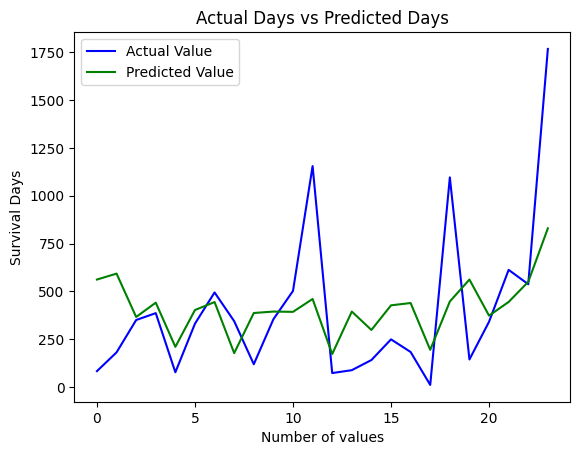

In [52]:
plt.plot(lin_y, color='blue', label = 'Actual Value')
plt.plot(lin_x, color='green', label='Predicted Value')
plt.title('Actual Days vs Predicted Days')
plt.xlabel('Number of values')
plt.ylabel('Survival Days')
plt.legend()
plt.show()